# Read SAS Files
The following data can be found here:
https://wwwn.cdc.gov/nchs/nhanes/

In [1]:
# Read SAS file
import pandas as pd

In [2]:
# NHANES 2017-2018 vaccination Immunization
nhanes1718_Vaccination = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/IMQ_J.XPT", format = "xport")

In [3]:
# NHANES 2017-2018 core antibody surface antigen
nhanes1718_BG = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HEPBD_J.XPT", format = "xport" )

In [4]:
# NHANES 2017-2018 surface antibody
nhanes1718_Antibody = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HEPB_S_J.XPT", format = "xport")

In [5]:
nhanes1718_Vaccination = nhanes1718_Vaccination[['SEQN','IMQ020']]

In [6]:
nhanes1718_BG = nhanes1718_BG[['SEQN','LBXHBC','LBDHBG']]

In [7]:
nhanes1718_Antibody

,SEQN,LBXHBS
0,93703.0,NaN
1,93704.0,1.0
2,93705.0,1.0
3,93706.0,2.0
4,93707.0,2.0
...,...,...
8148,102952.0,2.0
8149,102953.0,2.0
8150,102954.0,1.0
8151,102955.0,2.0


In [8]:
nhanes1718_No_vaccination = nhanes1718_Vaccination[(nhanes1718_Vaccination['IMQ020']==3.0) | (nhanes1718_Vaccination['IMQ020']==7.0) | (nhanes1718_Vaccination['IMQ020']==9.0)]

In [9]:
nhanes1718_No_vaccination

,SEQN,IMQ020
2,93705.0,3.0
6,93709.0,3.0
8,93711.0,9.0
10,93713.0,3.0
11,93714.0,3.0
...,...,...
9246,102949.0,3.0
9247,102950.0,3.0
9249,102952.0,3.0
9250,102953.0,3.0


In [10]:
nhanes1718_club_1 = pd.merge(nhanes1718_No_vaccination, nhanes1718_Antibody, on="SEQN", how = "left")

In [11]:
nhanes1718_club_2 = pd.merge(nhanes1718_club_1, nhanes1718_BG, on="SEQN", how = "left")

In [12]:
import pandas as pd
import pandas.io.sql as sqlio

In [13]:
#pip install pandasql

In [14]:
from pandasql import sqldf

In [15]:
query = '''
SELECT SEQN, (CASE WHEN LBXHBC = 1.0 THEN 'Positive' WHEN LBXHBC = 2.0 THEN 'Negative' WHEN LBXHBC IS NULL THEN 'Missing' END) AS Core_Antibody,
(CASE WHEN LBDHBG = 1.0 THEN 'Positive' WHEN LBDHBG = 2.0 THEN 'Negative' WHEN LBDHBG IS NULL THEN 'Missing' END) AS Surface_Antigen,
(CASE WHEN LBXHBS = 1.0 THEN 'Positive' WHEN LBXHBS = 2.0 THEN 'Negative' WHEN LBXHBS IS NULL THEN 'Missing' END) AS Surface_Antibody,
(CASE WHEN IMQ020 = 3.0 THEN 'No Doses' WHEN IMQ020 = 7.0 THEN 'Refused' WHEN IMQ020 = 9.0 THEN "Don't know" END) AS Vaccination
FROM nhanes1718_club_2
'''

In [16]:
nhanes1718_final = sqldf(query)

In [17]:
nhanes1718_final[(nhanes1718_final['Surface_Antigen'] == 'Negative') & (nhanes1718_final['Vaccination'] == "No Doses")]

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination
0,93705.0,Positive,Negative,Positive,No Doses
13,93728.0,Positive,Negative,Positive,No Doses
23,93743.0,Positive,Negative,Positive,No Doses
37,93770.0,Positive,Negative,Positive,No Doses
46,93781.0,Positive,Negative,Positive,No Doses
...,...,...,...,...,...
4763,102791.0,Positive,Negative,Negative,No Doses
4799,102851.0,Positive,Negative,Positive,No Doses
4801,102855.0,Positive,Negative,Positive,No Doses
4802,102856.0,Positive,Negative,Negative,No Doses


In [18]:
nhanes1718_final

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination
0,93705.0,Positive,Negative,Positive,No Doses
1,93709.0,Negative,Missing,Negative,No Doses
2,93711.0,Negative,Missing,Negative,Don't know
3,93713.0,Negative,Missing,Negative,No Doses
4,93714.0,Negative,Missing,Negative,No Doses
...,...,...,...,...,...
4845,102949.0,Negative,Missing,Negative,No Doses
4846,102950.0,Missing,Missing,Missing,No Doses
4847,102952.0,Positive,Negative,Negative,No Doses
4848,102953.0,Negative,Missing,Negative,No Doses


In [19]:
query2 = '''
SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, 
(CASE WHEN Surface_Antigen = 'Positive' THEN 'HBV Infection' WHEN (Surface_Antibody = 'Positive') THEN 'Vaccine Immunity' 
WHEN (Core_Antibody = 'Positive' and Surface_Antibody = 'Negative') THEN 'HBV Exposure' END) AS resp 
FROM nhanes1718_final
'''

In [20]:
nhanes1718_final_resp = sqldf(query2)

In [21]:
nhanes1718_final_resp[nhanes1718_final_resp['resp'].isna()]

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp
1,93709.0,Negative,Missing,Negative,No Doses,None
2,93711.0,Negative,Missing,Negative,Don't know,None
3,93713.0,Negative,Missing,Negative,No Doses,None
4,93714.0,Negative,Missing,Negative,No Doses,None
5,93715.0,Negative,Missing,Negative,No Doses,None
...,...,...,...,...,...,...
4844,102947.0,Negative,Missing,Negative,No Doses,None
4845,102949.0,Negative,Missing,Negative,No Doses,None
4846,102950.0,Missing,Missing,Missing,No Doses,None
4848,102953.0,Negative,Missing,Negative,No Doses,None


In [22]:
# NHANES 2017-2018 Hepatitis ever told
nhanes1718_evertold = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HEQ_J.XPT", format = "xport")

In [23]:
nhanes1718_evertold = nhanes1718_evertold[['SEQN','HEQ010']]

In [24]:
# left outer join prior data with evertold
nhanes1718_final_resp_comb = pd.merge(nhanes1718_final_resp, nhanes1718_evertold, on="SEQN", how = "left")

In [25]:
nhanes1718_final_resp_comb

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp,HEQ010
0,93705.0,Positive,Negative,Positive,No Doses,Vaccine Immunity,2.0
1,93709.0,Negative,Missing,Negative,No Doses,None,2.0
2,93711.0,Negative,Missing,Negative,Don't know,None,2.0
3,93713.0,Negative,Missing,Negative,No Doses,None,2.0
4,93714.0,Negative,Missing,Negative,No Doses,None,2.0
...,...,...,...,...,...,...,...
4845,102949.0,Negative,Missing,Negative,No Doses,None,2.0
4846,102950.0,Missing,Missing,Missing,No Doses,None,2.0
4847,102952.0,Positive,Negative,Negative,No Doses,HBV Exposure,2.0
4848,102953.0,Negative,Missing,Negative,No Doses,None,2.0


In [26]:
query3 = '''
SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, resp, HEQ010,
(CASE WHEN resp IS NULL and HEQ010 = 1.0 THEN 'HBV Infection' WHEN resp IS NULL and HEQ010 = 2.0 THEN 'No Infection' ELSE resp END) AS resp_2
FROM nhanes1718_final_resp_comb
'''

In [27]:
nhanes1718_final_resp_data = sqldf(query3)

In [28]:
nhanes1718_HBV = nhanes1718_final_resp_data[(nhanes1718_final_resp_data['resp_2']=='HBV Infection') | (nhanes1718_final_resp_data['resp_2']=='No Infection')].drop(columns=['resp'])

In [29]:
nhanes1718_HBV['resp_2'].unique()

array(['No Infection', 'HBV Infection'], dtype=object)

In [30]:
# NHANES 2017-2018 Demographic Variable
nhanes1718_Demographic = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.XPT", format = "xport")

In [31]:
#Added one more variable
Demographic_Variables = ['SEQN','SDDSRVYR','RIAGENDR','RIDAGEYR','RIDRETH3','DMQMILIZ','DMQADFC','DMDBORN4','DMDCITZN',
                        'DMDYRSUS','DMDEDUC2','DMDMARTL','WTINT2YR','WTMEC2YR','SDMVPSU','SDMVSTRA','INDFMPIR']

In [32]:
nhanes1718_Demographic = nhanes1718_Demographic[Demographic_Variables]

In [33]:
#Add HRBR4 in 2015-2016
import numpy as np

In [34]:
nhanes1718_Demographic['DMDHRBR4'] = np.nan

In [35]:
nhanes1718_HBV_Demo = pd.merge(nhanes1718_HBV, nhanes1718_Demographic, on="SEQN", how = "left")

In [36]:
nhanes1718_HBV_Demo

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,...,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,DMDHRBR4
0,93709.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,75.0,...,1.0,NaN,4.0,2.0,12043.388271,1.227756e+04,1.0,136.0,0.41,NaN
1,93711.0,Negative,Missing,Negative,Don't know,2.0,No Infection,10.0,1.0,56.0,...,1.0,6.0,5.0,1.0,11178.260106,1.239092e+04,2.0,134.0,5.00,NaN
2,93713.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,67.0,...,1.0,NaN,3.0,3.0,174806.575152,1.668417e+05,1.0,140.0,2.65,NaN
3,93714.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,54.0,...,1.0,NaN,4.0,1.0,15209.438644,1.547958e+04,1.0,147.0,1.86,NaN
4,93715.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,71.0,...,1.0,NaN,3.0,1.0,9402.255687,9.250905e+03,2.0,139.0,1.56,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,102947.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,75.0,...,1.0,NaN,5.0,3.0,13379.650721,1.356396e+04,2.0,137.0,4.28,NaN
3689,102949.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,33.0,...,1.0,NaN,3.0,6.0,29334.650205,3.028719e+04,2.0,139.0,1.01,NaN
3690,102950.0,Missing,Missing,Missing,No Doses,2.0,No Infection,10.0,1.0,64.0,...,1.0,NaN,3.0,1.0,11804.993503,5.397605e-79,2.0,136.0,2.13,NaN
3691,102953.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,42.0,...,2.0,77.0,3.0,4.0,61630.380013,6.366195e+04,2.0,137.0,NaN,NaN


In [37]:
# NHANES 2017-2018 Insurance
nhanes1718_Insurance = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HIQ_J.XPT", format = "xport")

In [38]:
Insurance_Variables = ['SEQN','HIQ011','HIQ031A','HIQ031B','HIQ031C','HIQ031D','HIQ031E','HIQ031H','HIQ031I','HIQ031AA']

In [39]:
nhanes1718_Insurance = nhanes1718_Insurance[Insurance_Variables]

In [40]:
nhanes1718_HBV_Demo_Insurance = pd.merge(nhanes1718_HBV_Demo, nhanes1718_Insurance, on="SEQN", how = "left")

In [41]:
query4 = '''
SELECT *, 
(CASE WHEN HIQ011 = 2.0 THEN 1 ELSE 0 END) AS No_Insurance,
(CASE WHEN HIQ011 = 1.0 and HIQ031A = 14.0 THEN 1 ELSE 0 END) AS Private_Insurance,
(CASE WHEN HIQ011 = 1.0 and (HIQ031A IS NOT NULL OR HIQ031B IS NOT NULL OR HIQ031C IS NOT NULL OR HIQ031D IS NOT NULL OR 
HIQ031E IS NOT NULL OR HIQ031H IS NOT NULL OR HIQ031I IS NOT NULL OR HIQ031AA IS NOT NULL) THEN 1 ELSE 0 END) Governement_Insurance
FROM nhanes1718_HBV_Demo_Insurance
'''

In [42]:
nhanes1718_HBV_Demo_Insurance = sqldf(query4)

In [43]:
nhanes1718_HBV_Demo_Insurance = nhanes1718_HBV_Demo_Insurance.drop(columns=['HIQ011','HIQ031A','HIQ031B','HIQ031C','HIQ031D','HIQ031E','HIQ031H','HIQ031I','HIQ031AA'])

In [44]:
nhanes1718_HBV_Demo_Insurance

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,...,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,DMDHRBR4,No_Insurance,Private_Insurance,Governement_Insurance
0,93709.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,75.0,...,2.0,12043.388271,1.227756e+04,1.0,136.0,0.41,None,0,0,1
1,93711.0,Negative,Missing,Negative,Don't know,2.0,No Infection,10.0,1.0,56.0,...,1.0,11178.260106,1.239092e+04,2.0,134.0,5.00,None,0,0,1
2,93713.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,67.0,...,3.0,174806.575152,1.668417e+05,1.0,140.0,2.65,None,0,0,1
3,93714.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,54.0,...,1.0,15209.438644,1.547958e+04,1.0,147.0,1.86,None,0,0,1
4,93715.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,71.0,...,1.0,9402.255687,9.250905e+03,2.0,139.0,1.56,None,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,102947.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,75.0,...,3.0,13379.650721,1.356396e+04,2.0,137.0,4.28,None,0,1,1
3689,102949.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,33.0,...,6.0,29334.650205,3.028719e+04,2.0,139.0,1.01,None,0,0,1
3690,102950.0,Missing,Missing,Missing,No Doses,2.0,No Infection,10.0,1.0,64.0,...,1.0,11804.993503,5.397605e-79,2.0,136.0,2.13,None,0,0,1
3691,102953.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,42.0,...,4.0,61630.380013,6.366195e+04,2.0,137.0,NaN,None,0,1,1


In [45]:
#Alcohol use
nhanes1718_Alcohol = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/ALQ_J.XPT", format = "xport")

In [46]:
nhanes1718_Alcohol = nhanes1718_Alcohol[['SEQN','ALQ130']]

In [47]:
nhanes1718 = pd.merge(nhanes1718_HBV_Demo_Insurance, nhanes1718_Alcohol, on="SEQN", how = "left")

In [48]:
#Healthcare Visits
nhanes1718_Healthcare = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HUQ_J.XPT", format = "xport")

In [49]:
nhanes1718_Healthcare = nhanes1718_Healthcare [['SEQN','HUQ051']]

In [50]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Healthcare, on="SEQN", how = "left")

In [51]:
#Dialysis
nhanes1718_Dialysis = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/KIQ_U_J.XPT", format = "xport")

In [52]:
nhanes1718_Dialysis = nhanes1718_Dialysis[['SEQN','KIQ025']]

In [53]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Dialysis, on="SEQN", how = "left")

In [54]:
#Liver Condition
nhanes1718_Liver_Condition = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/MCQ_J.XPT", format = "xport")

In [55]:
nhanes1718_Liver_Condition = nhanes1718_Liver_Condition[['SEQN','MCQ160L']]

In [56]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Liver_Condition, on="SEQN", how = "left")

In [57]:
#Blood Transfusion
nhanes1718_Blood_Transfusion = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/MCQ_J.XPT", format = "xport")

In [58]:
nhanes1718_Blood_Transfusion = nhanes1718_Blood_Transfusion[['SEQN','MCQ092']]

In [59]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Blood_Transfusion, on="SEQN", how = "left")

In [60]:
#Healthcare Visits time
nhanes1718_Healthcare_time = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HUQ_J.XPT", format = "xport")

In [61]:
nhanes1718_Healthcare_time = nhanes1718_Healthcare_time[['SEQN','HUQ061']]

In [62]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Healthcare_time, on="SEQN", how = "left")

In [63]:
#Hepatitis C
nhanes1718_Hepatitis_C = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HEQ_J.XPT", format = "xport")

In [64]:
nhanes1718_Hepatitis_C = nhanes1718_Hepatitis_C[['SEQN','HEQ030']]

In [65]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Hepatitis_C, on="SEQN", how = "left")

In [66]:
Biochemistry_Variables = ['SEQN','LBXSATSI','LBDSALSI','LBXSASSI']

In [67]:
#Biochemistry_Variables
nhanes1718_Biochemistry_Variables = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BIOPRO_J.XPT", format = "xport")

In [68]:
nhanes1718_Biochemistry_Variables = nhanes1718_Biochemistry_Variables[Biochemistry_Variables]

In [69]:
nhanes1718_Biochemistry_Variables['LBXSATSI'] = nhanes1718_Biochemistry_Variables['LBXSATSI'].apply(lambda x: 1.013*x + 2.688)
nhanes1718_Biochemistry_Variables['LBDSALSI'] = nhanes1718_Biochemistry_Variables['LBDSALSI'].apply(lambda x: 1.044*x + 0.01128)
nhanes1718_Biochemistry_Variables['LBXSASSI'] = nhanes1718_Biochemistry_Variables['LBXSASSI'].apply(lambda x: 1.018*x + 3.762)

In [70]:
nhanes1718_Biochemistry_Variables

,SEQN,LBXSATSI,LBDSALSI,LBXSASSI
0,93705.0,18.896,45.94728,24.122
1,93706.0,12.818,45.94728,18.014
2,93707.0,15.857,54.29928,28.194
3,93708.0,21.935,40.72728,25.140
4,93709.0,17.883,38.63928,21.068
...,...,...,...,...
6396,102952.0,24.974,50.12328,31.248
6397,102953.0,43.208,41.77128,33.284
6398,102954.0,8.766,40.72728,19.032
6399,102955.0,13.831,42.81528,20.050


In [71]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Biochemistry_Variables, on="SEQN", how = "left")

In [72]:
#Platelet count
nhanes1718_Platelet_count= pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/CBC_J.XPT", format = "xport")

In [73]:
nhanes1718_Platelet_count = nhanes1718_Platelet_count[['SEQN','LBXPLTSI']]

In [74]:
nhanes1718 = pd.merge(nhanes1718, nhanes1718_Platelet_count, on="SEQN", how = "left")

In [75]:
nhanes1718 = nhanes1718[nhanes1718['RIDAGEYR']>=18]

In [76]:
pd.set_option('display.max_columns', None)
nhanes1718.head()

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,DMDHRBR4,No_Insurance,Private_Insurance,Governement_Insurance,ALQ130,HUQ051,KIQ025,MCQ160L,MCQ092,HUQ061,HEQ030,LBXSATSI,LBDSALSI,LBXSASSI,LBXPLTSI
0,93709.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,2.0,12043.388271,12277.556662,1.0,136.0,0.41,None,0,0,1,NaN,3.000000e+00,NaN,2.0,2.0,NaN,2.0,17.883,38.63928,21.068,228.0
1,93711.0,Negative,Missing,Negative,Don't know,2.0,No Infection,10.0,1.0,56.0,6.0,2.0,NaN,2.0,1.0,6.0,5.0,1.0,11178.260106,12390.919724,2.0,134.0,5.00,None,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,22.948,41.77128,27.176,264.0
2,93713.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,67.0,3.0,1.0,1.0,1.0,1.0,NaN,3.0,3.0,174806.575152,166841.660681,1.0,140.0,2.65,None,0,0,1,3.0,5.397605e-79,NaN,2.0,2.0,3.0,2.0,20.922,44.90328,22.086,241.0
3,93714.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,54.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,1.0,15209.438644,15479.581198,1.0,147.0,1.86,None,0,0,1,1.0,1.000000e+00,NaN,2.0,2.0,NaN,2.0,24.974,35.50728,20.050,278.0
4,93715.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,71.0,7.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,9402.255687,9250.904672,2.0,139.0,1.56,None,0,0,1,NaN,7.000000e+00,NaN,2.0,2.0,NaN,2.0,14.844,43.85928,19.032,252.0


In [77]:
nhanes1718.shape

(3320, 38)

In [78]:
nhanes1718

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,DMDHRBR4,No_Insurance,Private_Insurance,Governement_Insurance,ALQ130,HUQ051,KIQ025,MCQ160L,MCQ092,HUQ061,HEQ030,LBXSATSI,LBDSALSI,LBXSASSI,LBXPLTSI
0,93709.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,2.0,12043.388271,1.227756e+04,1.0,136.0,0.41,None,0,0,1,NaN,3.000000e+00,NaN,2.0,2.0,NaN,2.0,17.883,38.63928,21.068,228.0
1,93711.0,Negative,Missing,Negative,Don't know,2.0,No Infection,10.0,1.0,56.0,6.0,2.0,NaN,2.0,1.0,6.0,5.0,1.0,11178.260106,1.239092e+04,2.0,134.0,5.00,None,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,22.948,41.77128,27.176,264.0
2,93713.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,67.0,3.0,1.0,1.0,1.0,1.0,NaN,3.0,3.0,174806.575152,1.668417e+05,1.0,140.0,2.65,None,0,0,1,3.0,5.397605e-79,NaN,2.0,2.0,3.0,2.0,20.922,44.90328,22.086,241.0
3,93714.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,54.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,1.0,15209.438644,1.547958e+04,1.0,147.0,1.86,None,0,0,1,1.0,1.000000e+00,NaN,2.0,2.0,NaN,2.0,24.974,35.50728,20.050,278.0
4,93715.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,71.0,7.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,9402.255687,9.250905e+03,2.0,139.0,1.56,None,0,0,1,NaN,7.000000e+00,NaN,2.0,2.0,NaN,2.0,14.844,43.85928,19.032,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,102943.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,48.0,1.0,2.0,NaN,1.0,1.0,NaN,4.0,6.0,27858.079434,2.951982e+04,1.0,148.0,4.31,None,0,0,1,2.0,2.000000e+00,NaN,1.0,2.0,NaN,2.0,34.091,40.72728,34.302,308.0
3688,102947.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,5.0,3.0,13379.650721,1.356396e+04,2.0,137.0,4.28,None,0,1,1,1.0,6.000000e+00,NaN,2.0,1.0,NaN,2.0,24.974,46.99128,30.230,118.0
3689,102949.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,33.0,3.0,2.0,NaN,1.0,1.0,NaN,3.0,6.0,29334.650205,3.028719e+04,2.0,139.0,1.01,None,0,0,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,2.0,29.026,46.99128,33.284,254.0
3690,102950.0,Missing,Missing,Missing,No Doses,2.0,No Infection,10.0,1.0,64.0,4.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,11804.993503,5.397605e-79,2.0,136.0,2.13,None,0,0,1,NaN,5.000000e+00,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN


In [79]:
nhanes1718 = nhanes1718.rename(columns = {'SEQN': 'Respondent_sequence_number',
'SDDSRVYR': 'Data_release_cycle',
'RIAGENDR': 'Gender',
'RIDAGEYR': 'Age',
'RIDRETH3': 'Race_Ethnicity',
'DMQMILIZ': 'Veteran_Status',
'DMDBORN4' : 'Country_of_birth',
'DMDCITZN': 'Citizenship_status',
'DMDYRSUS': 'Length_of_time_in_US',
'DMDEDUC2': 'Education_level',
'DMDMARTL' : 'Marital_status',
'WTINT2YR' : '2_year_interview_weight',
'WTMEC2YR':'2_year_MEC_weight',
'SDMVPSU': 'Masked_variance_PSU',
'SDMVSTRA': 'Masked_variance_stratum',
'INDFMPIR' : 'Ratio_income_poverty',
'ALQ130': 'Alcohol_1_year',
'HUQ051': 'Health_care_1_year',
'KIQ025': 'Dialysis_1_year',
'MCQ160L': 'liver_condition',
'MCQ092' : 'Blood_Transfusion',
'HUQ061': 'Last_Healthcare_Visit',
#'Hepatitis_C': 'Hepatitis_C',
'LBXSATSI': 'ALT',
'LBDSALSI': 'Albumin',
'LBXSASSI' : 'AST',
'LBXPLTSI': 'Platelet_Count'
                            
                           })

In [80]:
nhanes1718

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,DMQADFC,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,DMDHRBR4,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,HEQ030,ALT,Albumin,AST,Platelet_Count
0,93709.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,2.0,12043.388271,1.227756e+04,1.0,136.0,0.41,None,0,0,1,NaN,3.000000e+00,NaN,2.0,2.0,NaN,2.0,17.883,38.63928,21.068,228.0
1,93711.0,Negative,Missing,Negative,Don't know,2.0,No Infection,10.0,1.0,56.0,6.0,2.0,NaN,2.0,1.0,6.0,5.0,1.0,11178.260106,1.239092e+04,2.0,134.0,5.00,None,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,22.948,41.77128,27.176,264.0
2,93713.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,67.0,3.0,1.0,1.0,1.0,1.0,NaN,3.0,3.0,174806.575152,1.668417e+05,1.0,140.0,2.65,None,0,0,1,3.0,5.397605e-79,NaN,2.0,2.0,3.0,2.0,20.922,44.90328,22.086,241.0
3,93714.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,54.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,1.0,15209.438644,1.547958e+04,1.0,147.0,1.86,None,0,0,1,1.0,1.000000e+00,NaN,2.0,2.0,NaN,2.0,24.974,35.50728,20.050,278.0
4,93715.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,71.0,7.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,9402.255687,9.250905e+03,2.0,139.0,1.56,None,0,0,1,NaN,7.000000e+00,NaN,2.0,2.0,NaN,2.0,14.844,43.85928,19.032,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,102943.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,48.0,1.0,2.0,NaN,1.0,1.0,NaN,4.0,6.0,27858.079434,2.951982e+04,1.0,148.0,4.31,None,0,0,1,2.0,2.000000e+00,NaN,1.0,2.0,NaN,2.0,34.091,40.72728,34.302,308.0
3688,102947.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,5.0,3.0,13379.650721,1.356396e+04,2.0,137.0,4.28,None,0,1,1,1.0,6.000000e+00,NaN,2.0,1.0,NaN,2.0,24.974,46.99128,30.230,118.0
3689,102949.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,33.0,3.0,2.0,NaN,1.0,1.0,NaN,3.0,6.0,29334.650205,3.028719e+04,2.0,139.0,1.01,None,0,0,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,2.0,29.026,46.99128,33.284,254.0
3690,102950.0,Missing,Missing,Missing,No Doses,2.0,No Infection,10.0,1.0,64.0,4.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,11804.993503,5.397605e-79,2.0,136.0,2.13,None,0,0,1,NaN,5.000000e+00,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN


In [81]:
nhanes1718 = nhanes1718.rename(columns = {'DMQADFC':'Foreign_country',
                                         'DMDHRBR4':'HH_Country_of_Birth',
                                         'HEQ030':'Hepatitis_C_evertold'})

In [82]:
nhanes1718

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Foreign_country,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,HH_Country_of_Birth,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C_evertold,ALT,Albumin,AST,Platelet_Count
0,93709.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,2.0,12043.388271,1.227756e+04,1.0,136.0,0.41,None,0,0,1,NaN,3.000000e+00,NaN,2.0,2.0,NaN,2.0,17.883,38.63928,21.068,228.0
1,93711.0,Negative,Missing,Negative,Don't know,2.0,No Infection,10.0,1.0,56.0,6.0,2.0,NaN,2.0,1.0,6.0,5.0,1.0,11178.260106,1.239092e+04,2.0,134.0,5.00,None,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,22.948,41.77128,27.176,264.0
2,93713.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,67.0,3.0,1.0,1.0,1.0,1.0,NaN,3.0,3.0,174806.575152,1.668417e+05,1.0,140.0,2.65,None,0,0,1,3.0,5.397605e-79,NaN,2.0,2.0,3.0,2.0,20.922,44.90328,22.086,241.0
3,93714.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,54.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,1.0,15209.438644,1.547958e+04,1.0,147.0,1.86,None,0,0,1,1.0,1.000000e+00,NaN,2.0,2.0,NaN,2.0,24.974,35.50728,20.050,278.0
4,93715.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,71.0,7.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,9402.255687,9.250905e+03,2.0,139.0,1.56,None,0,0,1,NaN,7.000000e+00,NaN,2.0,2.0,NaN,2.0,14.844,43.85928,19.032,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,102943.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,2.0,48.0,1.0,2.0,NaN,1.0,1.0,NaN,4.0,6.0,27858.079434,2.951982e+04,1.0,148.0,4.31,None,0,0,1,2.0,2.000000e+00,NaN,1.0,2.0,NaN,2.0,34.091,40.72728,34.302,308.0
3688,102947.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,5.0,3.0,13379.650721,1.356396e+04,2.0,137.0,4.28,None,0,1,1,1.0,6.000000e+00,NaN,2.0,1.0,NaN,2.0,24.974,46.99128,30.230,118.0
3689,102949.0,Negative,Missing,Negative,No Doses,2.0,No Infection,10.0,1.0,33.0,3.0,2.0,NaN,1.0,1.0,NaN,3.0,6.0,29334.650205,3.028719e+04,2.0,139.0,1.01,None,0,0,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,2.0,29.026,46.99128,33.284,254.0
3690,102950.0,Missing,Missing,Missing,No Doses,2.0,No Infection,10.0,1.0,64.0,4.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,11804.993503,5.397605e-79,2.0,136.0,2.13,None,0,0,1,NaN,5.000000e+00,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN


In [83]:
nhanes1718 = nhanes1718.drop(columns=['HEQ010'])

In [84]:
nhanes1718

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Foreign_country,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,HH_Country_of_Birth,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C_evertold,ALT,Albumin,AST,Platelet_Count
0,93709.0,Negative,Missing,Negative,No Doses,No Infection,10.0,2.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,2.0,12043.388271,1.227756e+04,1.0,136.0,0.41,None,0,0,1,NaN,3.000000e+00,NaN,2.0,2.0,NaN,2.0,17.883,38.63928,21.068,228.0
1,93711.0,Negative,Missing,Negative,Don't know,No Infection,10.0,1.0,56.0,6.0,2.0,NaN,2.0,1.0,6.0,5.0,1.0,11178.260106,1.239092e+04,2.0,134.0,5.00,None,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,22.948,41.77128,27.176,264.0
2,93713.0,Negative,Missing,Negative,No Doses,No Infection,10.0,1.0,67.0,3.0,1.0,1.0,1.0,1.0,NaN,3.0,3.0,174806.575152,1.668417e+05,1.0,140.0,2.65,None,0,0,1,3.0,5.397605e-79,NaN,2.0,2.0,3.0,2.0,20.922,44.90328,22.086,241.0
3,93714.0,Negative,Missing,Negative,No Doses,No Infection,10.0,2.0,54.0,4.0,2.0,NaN,1.0,1.0,NaN,4.0,1.0,15209.438644,1.547958e+04,1.0,147.0,1.86,None,0,0,1,1.0,1.000000e+00,NaN,2.0,2.0,NaN,2.0,24.974,35.50728,20.050,278.0
4,93715.0,Negative,Missing,Negative,No Doses,No Infection,10.0,1.0,71.0,7.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,9402.255687,9.250905e+03,2.0,139.0,1.56,None,0,0,1,NaN,7.000000e+00,NaN,2.0,2.0,NaN,2.0,14.844,43.85928,19.032,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,102943.0,Negative,Missing,Negative,No Doses,No Infection,10.0,2.0,48.0,1.0,2.0,NaN,1.0,1.0,NaN,4.0,6.0,27858.079434,2.951982e+04,1.0,148.0,4.31,None,0,0,1,2.0,2.000000e+00,NaN,1.0,2.0,NaN,2.0,34.091,40.72728,34.302,308.0
3688,102947.0,Negative,Missing,Negative,No Doses,No Infection,10.0,1.0,75.0,4.0,2.0,NaN,1.0,1.0,NaN,5.0,3.0,13379.650721,1.356396e+04,2.0,137.0,4.28,None,0,1,1,1.0,6.000000e+00,NaN,2.0,1.0,NaN,2.0,24.974,46.99128,30.230,118.0
3689,102949.0,Negative,Missing,Negative,No Doses,No Infection,10.0,1.0,33.0,3.0,2.0,NaN,1.0,1.0,NaN,3.0,6.0,29334.650205,3.028719e+04,2.0,139.0,1.01,None,0,0,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,2.0,29.026,46.99128,33.284,254.0
3690,102950.0,Missing,Missing,Missing,No Doses,No Infection,10.0,1.0,64.0,4.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,11804.993503,5.397605e-79,2.0,136.0,2.13,None,0,0,1,NaN,5.000000e+00,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN


In [85]:
import numpy as np
column_mapping = {
    'Gender':{1.0:"male", 2.0:"Female", np.nan:"missing"},
    'Race_Ethnicity':{1.0:"Mexican American",2.0:"Other Hispanic",3.0:"Non-Hispanic White",4.0:"Non-Hispanic Black",6.0:"Non-Hispanic Asian",7.0:"Other Race - Including Multi-Racial"},
    'Veteran_Status':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Foreign_country':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Country_of_birth':{1.0:"US", 2.0:"Other",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Citizenship_status':{1.0:"Citizen",2.0:"Not a citizen",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Length_of_time_in_US':{1.0:"Less than 1 year",2.0:"1-5",3.0:"5-10",4.0:"10-15",5.0:"15-20",6.0:"20-30",7.0:"30-40",8.0:"40-50",9.0:"50 or more",77.0:"Refused",88.0:"Could not determine",99.0:"Don't know",np.nan:"missing"},
    'Education_level':{1.0:"Less Than 9th Grade",2.0:"9-12th Grade",3.0:"High School Grad/GED or Equivalent",4.0:"Some College or AA degree",5.0:"College Graduate or above",7.0:"Refused",9.0:"Don't Know",np.nan:"missing"},
    'Marital_status':{1.0:"Married",2.0:"Widowed",3.0:"Divorced",4.0:"Separated",5.0:"Never married",6.0:"Living with partner",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'HH_Country_of_Birth':{1.0:"US", 2.0:"Other",77.0:"Refused",99.0:"Don't know",np.nan:"Missing"},
    'Health_care_1_year':{5.397605e-79:"None",1.0:"1",2.0:"2 to 3",3.0:"4 to 9",4.0:"10 to 12",5.0:"13 or more",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Dialysis_1_year':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'liver_condition':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Blood_Transfusion':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Last_Healthcare_Visit':{1.0:"6 months or less",2.0:"More than 6 months, but not more than 1 year ago",3.0:"More than 1 year, but not more than 3 years ago",4.0:"More than 3 years",5.0:"Never",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Hepatitis_C_evertold':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"}
}

nhanes1718.replace(column_mapping,inplace=True)

In [86]:
nhanes1718

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Foreign_country,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,HH_Country_of_Birth,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C_evertold,ALT,Albumin,AST,Platelet_Count
0,93709.0,Negative,Missing,Negative,No Doses,No Infection,10.0,Female,75.0,Non-Hispanic Black,No,missing,US,Citizen,missing,Some College or AA degree,Widowed,12043.388271,1.227756e+04,1.0,136.0,0.41,Missing,0,0,1,NaN,4 to 9,missing,No,No,missing,No,17.883,38.63928,21.068,228.0
1,93711.0,Negative,Missing,Negative,Don't know,No Infection,10.0,male,56.0,Non-Hispanic Asian,No,missing,Other,Citizen,20-30,College Graduate or above,Married,11178.260106,1.239092e+04,2.0,134.0,5.00,Missing,0,0,1,1.0,4 to 9,missing,No,No,missing,No,22.948,41.77128,27.176,264.0
2,93713.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,67.0,Non-Hispanic White,Yes,Yes,US,Citizen,missing,High School Grad/GED or Equivalent,Divorced,174806.575152,1.668417e+05,1.0,140.0,2.65,Missing,0,0,1,3.0,0.0,missing,No,No,"More than 1 year, but not more than 3 years ago",No,20.922,44.90328,22.086,241.0
3,93714.0,Negative,Missing,Negative,No Doses,No Infection,10.0,Female,54.0,Non-Hispanic Black,No,missing,US,Citizen,missing,Some College or AA degree,Married,15209.438644,1.547958e+04,1.0,147.0,1.86,Missing,0,0,1,1.0,1,missing,No,No,missing,No,24.974,35.50728,20.050,278.0
4,93715.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,71.0,Other Race - Including Multi-Racial,No,missing,US,Citizen,missing,High School Grad/GED or Equivalent,Married,9402.255687,9.250905e+03,2.0,139.0,1.56,Missing,0,0,1,NaN,7.0,missing,No,No,missing,No,14.844,43.85928,19.032,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,102943.0,Negative,Missing,Negative,No Doses,No Infection,10.0,Female,48.0,Mexican American,No,missing,US,Citizen,missing,Some College or AA degree,Living with partner,27858.079434,2.951982e+04,1.0,148.0,4.31,Missing,0,0,1,2.0,2 to 3,missing,Yes,No,missing,No,34.091,40.72728,34.302,308.0
3688,102947.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,75.0,Non-Hispanic Black,No,missing,US,Citizen,missing,College Graduate or above,Divorced,13379.650721,1.356396e+04,2.0,137.0,4.28,Missing,0,1,1,1.0,6.0,missing,No,Yes,missing,No,24.974,46.99128,30.230,118.0
3689,102949.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,33.0,Non-Hispanic White,No,missing,US,Citizen,missing,High School Grad/GED or Equivalent,Living with partner,29334.650205,3.028719e+04,2.0,139.0,1.01,Missing,0,0,1,NaN,1,missing,No,No,missing,No,29.026,46.99128,33.284,254.0
3690,102950.0,Missing,Missing,Missing,No Doses,No Infection,10.0,male,64.0,Non-Hispanic Black,Yes,No,US,Citizen,missing,High School Grad/GED or Equivalent,Married,11804.993503,5.397605e-79,2.0,136.0,2.13,Missing,0,0,1,NaN,13 or more,missing,No,No,missing,No,NaN,NaN,NaN,NaN


In [88]:
for i in list(nhanes1718.columns):
    print(i, ":", nhanes1718[(nhanes1718[i]=='missing') | (nhanes1718[i].isna())].shape[0]*100.0/nhanes1718.shape[0])

Respondent_sequence_number : 0.0
Core_Antibody : 0.0
Surface_Antigen : 0.0
Surface_Antibody : 0.0
Vaccination : 0.0
resp_2 : 0.0
Data_release_cycle : 0.0
Gender : 0.0
Age : 0.0
Race_Ethnicity : 0.0
Veteran_Status : 0.0
Foreign_country : 89.06626506024097
Country_of_birth : 0.0
Citizenship_status : 0.030120481927710843
Length_of_time_in_US : 70.72289156626506
Education_level : 2.5301204819277108
Marital_status : 2.5301204819277108
2_year_interview_weight : 0.0
2_year_MEC_weight : 0.0
Masked_variance_PSU : 0.0
Masked_variance_stratum : 0.0
Ratio_income_poverty : 14.819277108433734
HH_Country_of_Birth : 0.0
No_Insurance : 0.0
Private_Insurance : 0.0
Governement_Insurance : 0.0
Alcohol_1_year : 42.80120481927711
Health_care_1_year : 0.0
Dialysis_1_year : 95.51204819277109
liver_condition : 2.5301204819277108
Blood_Transfusion : 0.0
Last_Healthcare_Visit : 83.46385542168674
Hepatitis_C_evertold : 0.0
ALT : 14.036144578313253
Albumin : 14.006024096385541
AST : 14.30722891566265
Platelet_Coun

In [89]:
#Remove Last Healthcare Visits
#Remove Length_of_time_in_Us
#Remove Dialysis_1_year

In [90]:
nhanes1718 = nhanes1718.drop(columns=['Foreign_country','Dialysis_1_year','Last_Healthcare_Visit','Length_of_time_in_US'])

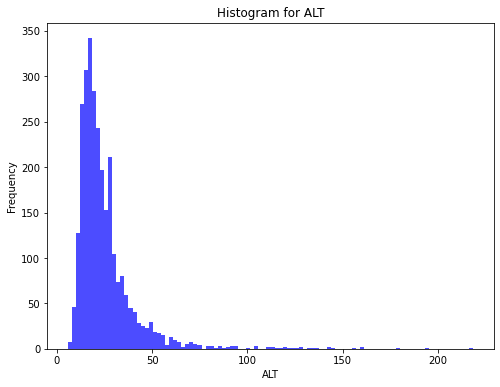

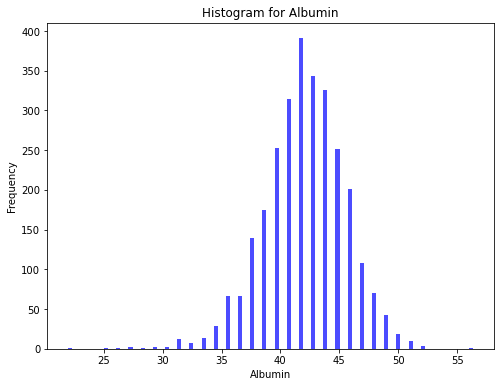

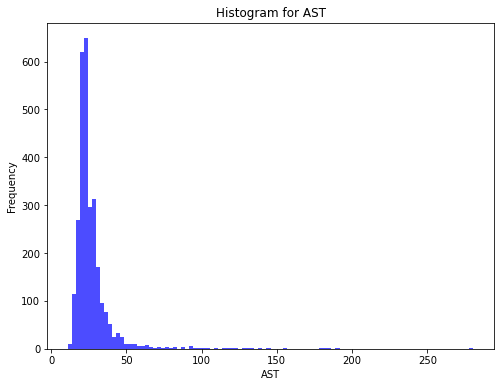

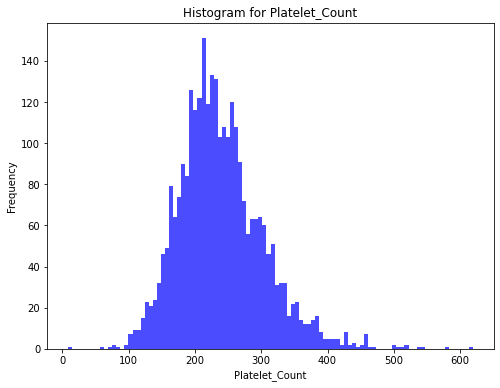

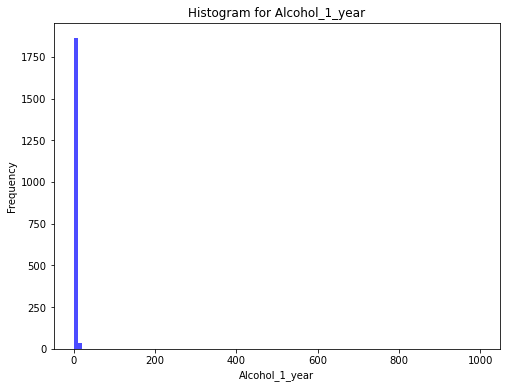

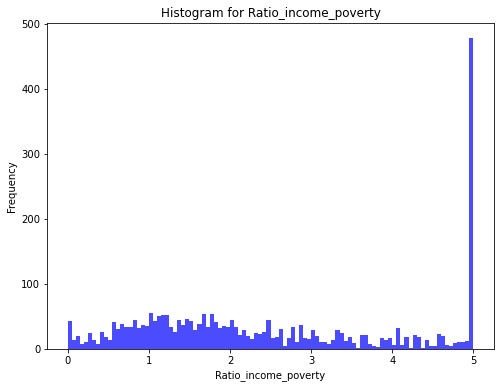

In [91]:
import matplotlib.pyplot as plt
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count', 'Alcohol_1_year', 'Ratio_income_poverty']

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(nhanes1718[~nhanes1718[column].isna()][column], bins=100, color='blue', alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [92]:
#Impute ALT, AST, PLT, PST with medians
#Impute income poverty ratio with PSU weighted means
#Impute Alcohol 1 year with weighted means
#Delete rows where Categorical features are missing

In [93]:
# Deleting records where categorical columns have missing values
categorical_columns = ['Education_level','Marital_status','liver_condition']

# Drop rows with missing values in specified categorical columns
nhanes1718= nhanes1718.dropna(subset=categorical_columns)

In [94]:
#Imputing biochemistry variables
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count']

# Impute missing values with median
for column in continuous_columns:
    median_value = nhanes1718[column].median()
    nhanes1718[column].fillna(median_value, inplace=True)

In [95]:
#Imputing alcohol_1_year
alcohol_column = 'Alcohol_1_year'
weights_column = '2_year_interview_weight'  

# Calculate the weighted mean for Alcohol_1_year
weighted_mean = (nhanes1718[alcohol_column] * nhanes1718[weights_column]).sum() / nhanes1718[weights_column].sum()

# Impute missing values with the weighted mean for Alcohol_1_year
nhanes1718[alcohol_column].fillna(weighted_mean, inplace=True)

In [96]:
nhanes1718.columns

Index(['Respondent_sequence_number', 'Core_Antibody', 'Surface_Antigen',
       'Surface_Antibody', 'Vaccination', 'resp_2', 'Data_release_cycle',
       'Gender', 'Age', 'Race_Ethnicity', 'Veteran_Status', 'Country_of_birth',
       'Citizenship_status', 'Education_level', 'Marital_status',
       '2_year_interview_weight', '2_year_MEC_weight', 'Masked_variance_PSU',
       'Masked_variance_stratum', 'Ratio_income_poverty',
       'HH_Country_of_Birth', 'No_Insurance', 'Private_Insurance',
       'Governement_Insurance', 'Alcohol_1_year', 'Health_care_1_year',
       'liver_condition', 'Blood_Transfusion', 'Hepatitis_C_evertold', 'ALT',
       'Albumin', 'AST', 'Platelet_Count'],
      dtype='object')

In [97]:
nhanes1718['concat'] = nhanes1718['Masked_variance_stratum'].astype(str) + '_' + nhanes1718['Masked_variance_PSU'].astype(str)

In [98]:
nhanes1718['product'] = nhanes1718['Ratio_income_poverty']*nhanes1718['2_year_interview_weight']

In [99]:
nhanes1718_temp = nhanes1718.groupby('concat').sum()['product'].reset_index()

In [100]:
nhanes1718_temp_2 = nhanes1718.groupby('concat').sum()['2_year_interview_weight'].reset_index()

In [101]:
nhanes1718_temp_3  = pd.merge(nhanes1718_temp, nhanes1718_temp_2, on="concat", how = "left")

In [102]:
nhanes1718_temp_3['rip'] = nhanes1718_temp_3['product']/nhanes1718_temp_3['2_year_interview_weight']

In [103]:
nhanes1718_temp_4 = nhanes1718_temp_3[['concat','rip']]

In [104]:
nhanes1718 = pd.merge(nhanes1718,nhanes1718_temp_4, on='concat', how='left')

# Fill missing values in col_to_fill with mapping_value
nhanes1718['Ratio_income_poverty'] = nhanes1718['Ratio_income_poverty'].fillna(nhanes1718['rip'])

In [105]:
nhanes1718 = nhanes1718.drop(columns=['product','rip'])

In [110]:
# Replace "missing" with NaN
nhanes1718.replace('missing', np.nan, inplace=True)

# Drop rows with any missing values
nhanes1718 = nhanes1718.dropna()

In [115]:
nhanes1718 = nhanes1718.drop(columns=['HH_Country_of_Birth'])

In [116]:
nhanes1718

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Country_of_birth,Citizenship_status,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,liver_condition,Blood_Transfusion,Hepatitis_C_evertold,ALT,Albumin,AST,Platelet_Count,concat
0,93709.0,Negative,Missing,Negative,No Doses,No Infection,10.0,Female,75.0,Non-Hispanic Black,No,US,Citizen,Some College or AA degree,Widowed,12043.388271,1.227756e+04,1.0,136.0,0.410000,0,0,1,2.104279,4 to 9,No,No,No,17.883,38.63928,21.068,228.0,136.0_1.0
1,93711.0,Negative,Missing,Negative,Don't know,No Infection,10.0,male,56.0,Non-Hispanic Asian,No,Other,Citizen,College Graduate or above,Married,11178.260106,1.239092e+04,2.0,134.0,5.000000,0,0,1,1.000000,4 to 9,No,No,No,22.948,41.77128,27.176,264.0,134.0_2.0
2,93713.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,67.0,Non-Hispanic White,Yes,US,Citizen,High School Grad/GED or Equivalent,Divorced,174806.575152,1.668417e+05,1.0,140.0,2.650000,0,0,1,3.000000,0.0,No,No,No,20.922,44.90328,22.086,241.0,140.0_1.0
3,93714.0,Negative,Missing,Negative,No Doses,No Infection,10.0,Female,54.0,Non-Hispanic Black,No,US,Citizen,Some College or AA degree,Married,15209.438644,1.547958e+04,1.0,147.0,1.860000,0,0,1,1.000000,1,No,No,No,24.974,35.50728,20.050,278.0,147.0_1.0
4,93715.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,71.0,Other Race - Including Multi-Racial,No,US,Citizen,High School Grad/GED or Equivalent,Married,9402.255687,9.250905e+03,2.0,139.0,1.560000,0,0,1,2.104279,7.0,No,No,No,14.844,43.85928,19.032,252.0,139.0_2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,102943.0,Negative,Missing,Negative,No Doses,No Infection,10.0,Female,48.0,Mexican American,No,US,Citizen,Some College or AA degree,Living with partner,27858.079434,2.951982e+04,1.0,148.0,4.310000,0,0,1,2.000000,2 to 3,Yes,No,No,34.091,40.72728,34.302,308.0,148.0_1.0
3316,102947.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,75.0,Non-Hispanic Black,No,US,Citizen,College Graduate or above,Divorced,13379.650721,1.356396e+04,2.0,137.0,4.280000,0,1,1,1.000000,6.0,No,Yes,No,24.974,46.99128,30.230,118.0,137.0_2.0
3317,102949.0,Negative,Missing,Negative,No Doses,No Infection,10.0,male,33.0,Non-Hispanic White,No,US,Citizen,High School Grad/GED or Equivalent,Living with partner,29334.650205,3.028719e+04,2.0,139.0,1.010000,0,0,1,2.104279,1,No,No,No,29.026,46.99128,33.284,254.0,139.0_2.0
3318,102950.0,Missing,Missing,Missing,No Doses,No Infection,10.0,male,64.0,Non-Hispanic Black,Yes,US,Citizen,High School Grad/GED or Equivalent,Married,11804.993503,5.397605e-79,2.0,136.0,2.130000,0,0,1,2.104279,13 or more,No,No,No,20.922,41.77128,23.104,231.0,136.0_2.0
